### Template Matching


There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag cv2.TM_SQDIFF.

So what exactly is the cv2.matchTemplate function doing? Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is.

Regions with sufficiently high correlation can be considered “matches” for our waldo template. From there, all we need is a call to cv2.minMaxLoc on Line 22 to find where our “good” matches are. That’s really all there is to template matching!

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pltimage(img,title,value):
    plt.figure(figsize=(10,8))
    for i in range(value):
        plt.subplot(2,2,i+1)
        plt.imshow(img[i],'gray')
        plt.title(title[i])
        plt.xticks([]),plt.yticks([])
    return plt.show() 

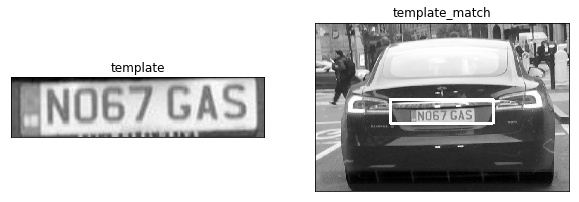

In [3]:
# Load input image and convert to grayscale
image = cv2.imread('Input/Image/Tesla-Model-S1.jpg',0)
img  = image.copy()
# cv2.imshow('Where is Waldo?', image)
# cv2.waitKey(0)

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('Input/Image/teslatemplate.PNG',0)
w, h = template.shape[::-1]
result = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
match = cv2.rectangle(image, top_left, bottom_right, (255,0,255), 5)

titles = ['template','template_match']
images = [template,match]
pltimage(images,titles,2)

# cv2.imshow('Where is plate?', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Template matching using different techniques

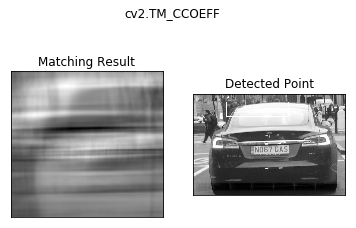

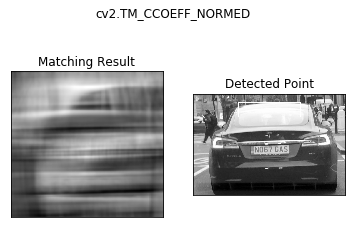

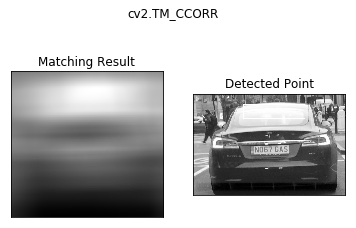

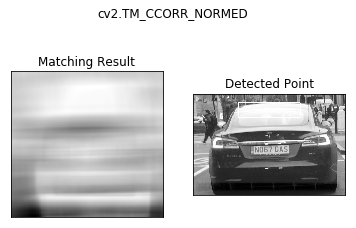

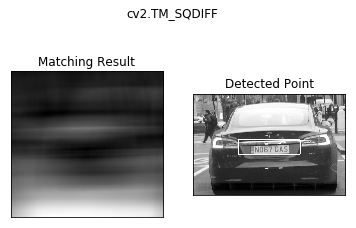

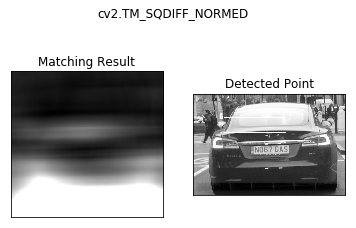

In [4]:
img = cv2.imread('Input/Image/Tesla-Model-S1.jpg',0)
img2 = img.copy()
template = cv2.imread('Input/Image/teslatemplate.PNG',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right,(255,255,255), 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

### Finding corners

Harris Corner Detection is an algorithm developed in 1998 for corner detection (http://www.bmva.org/bmvc/1988/avc-88-023.pdf) and works fairly well.¶
cv2.cornerHarris(input image, block size, ksize, k)

Input image - should be grayscale and float32 type.
blockSize - the size of neighborhood considered for corner detection
ksize - aperture parameter of Sobel derivative used.
k - harris detector free parameter in the equation
Output – array of corner locations (x,y)

In [5]:
import cv2
import numpy as np

# Load image then grayscale
image = cv2.imread('Input/Image/chess.JPG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# The cornerHarris function requires the array datatype to be float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them\
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

cv2.imshow('Harris Corners', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Improved Corner Detection using - Good Features to Track

**cv2.goodFeaturesToTrack**(input image, maxCorners, qualityLevel, minDistance)

- Input Image - 8-bit or floating-point 32-bit, single-channel image.
- maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
- qualityLevel – Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure (smallest eigenvalue). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the  qualityLevel=0.01 , then all the corners with the quality - - measure less than 15 are rejected.
- minDistance – Minimum possible Euclidean distance between the returned corners.

In [6]:
img = cv2.imread('Input/Image/chess.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# We specific the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 150)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img,(x-10,y-10),(x+10,y+10),(0,255,0), 2)
    
cv2.imshow("Corners Found", img)
cv2.waitKey()
cv2.destroyAllWindows()